In [1]:
# read in wrfout files

import os
os.environ['PROJ_LIB'] = '/home/jlee/.conda/envs/mmc_sgp/share/proj'

import glob
import wrf
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt

site_latitude  = 36.6050
site_longitude = -97.485

# wrf_dir = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/'
wrf_dir = '/home/jlee/mmc/jlee/sgp/wrf-mmc/wrf-runs/'

# wrf_path = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/'
# wrf_path = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l5_0805m/'

In [2]:
def get_pblh(wrf_path, domain): 
    
    wrf_file_list = glob.glob(wrf_path+'/wrfout_d0'+str(domain)+'*')

    for ind, file in enumerate(wrf_file_list):

        wrf_single = Dataset(file, 'r')

        site_loc_ij = wrf.ll_to_xy(wrf_single, site_latitude, site_longitude)

        pblh = wrf.getvar(wrf_single, 'PBLH')
        pblh_1pt = pblh[site_loc_ij.values[1], site_loc_ij.values[0]]

        if ind == 0: 
            pblh_1pt_all = pblh_1pt
        else: 
            pblh_1pt_all = xr.concat([pblh_1pt, pblh_1pt_all], dim='Time')

    return pblh_1pt_all.sortby('Time')

In [3]:
wrf_path = wrf_dir+'o1_0901m_30s'

pblh_d02 = get_pblh(wrf_path, 2)
pblh_d03 = get_pblh(wrf_path, 3)
pblh_d04 = get_pblh(wrf_path, 4)

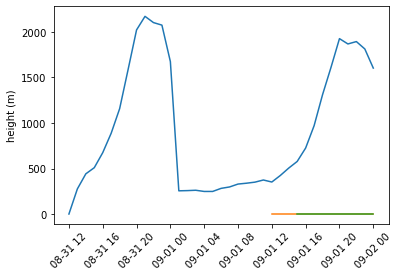

In [4]:
plt.plot(pblh_d02['Time'], pblh_d02)
plt.plot(pblh_d03['Time'], pblh_d03)
plt.plot(pblh_d04['Time'], pblh_d04)
plt.tick_params(axis='x', rotation=45)
plt.ylabel('height (m)')
plt.show()

In [5]:
# obs_dir = '/projects/mmcpnnl/sgp_obs/'
obs_dir = '/home/jlee/mmc/jlee/sgp/sgp_obs/'
# ceil_ncs = obs_dir+'sgpceilpblhtC1.a0/*.cdf' # data not good on 5 Aug
ceil_ncs = obs_dir+'sgppblhtdlC1.c1/*.nc'
ceil = xr.open_mfdataset(ceil_ncs)

In [6]:
eval_date = '2018-09-01'
ceil_target = ceil.sel(time=slice(eval_date, eval_date))
# ceil_target

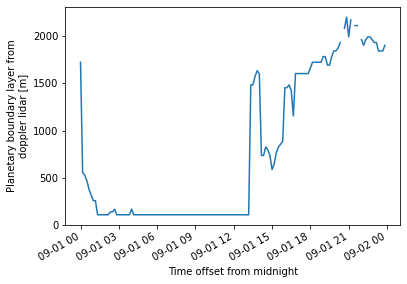

In [7]:
ceil_target['pbl_height_dl'].where(ceil_target['qc_pbl_height_dl'] <= 0).plot()

In [9]:
wrf_path = wrf_dir+'o1_0901m_30s'

pblh_d02l = get_pblh(wrf_path, 2)

In [10]:
wrf_path = wrf_dir+'o5_0901m_9s1s'

pblh_d02t = get_pblh(wrf_path, 2)

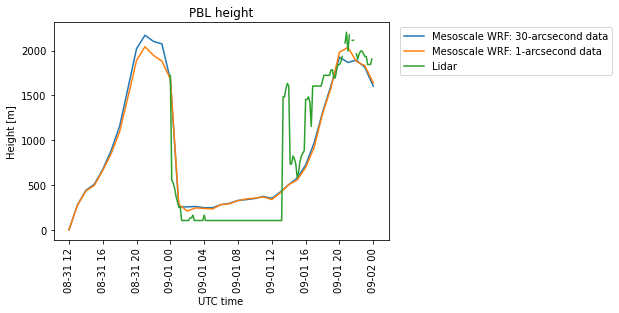

In [12]:
# plt.plot(pblh_d02['Time'], pblh_d02, label='Mesoscale WRF: 30-arcsecond land use data')
plt.plot(pblh_d02l['Time'], pblh_d02l, label='Mesoscale WRF: 30-arcsecond data')
plt.plot(pblh_d02t['Time'], pblh_d02t, label='Mesoscale WRF: 1-arcsecond data')
plt.plot(ceil_target['time'], ceil_target['pbl_height_dl'].where(ceil_target['qc_pbl_height_dl'] <= 0), label='Lidar')
plt.title('PBL height')
plt.ylabel('Height [m]')
plt.xlabel('UTC time')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',)
plt.xticks(rotation=90)
plt.show()

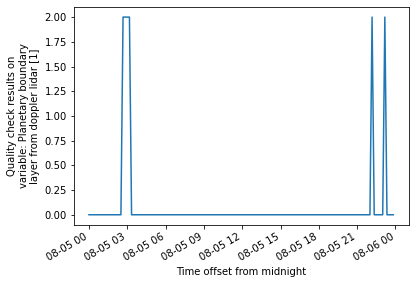

In [30]:
ceil_target['qc_pbl_height_dl'].plot()

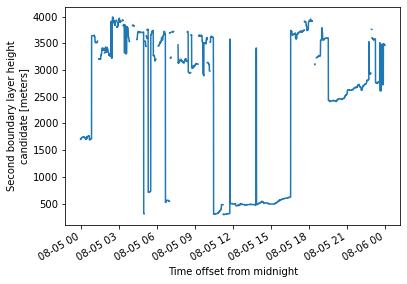

In [22]:
ceil_target['bl_height_2'].plot()

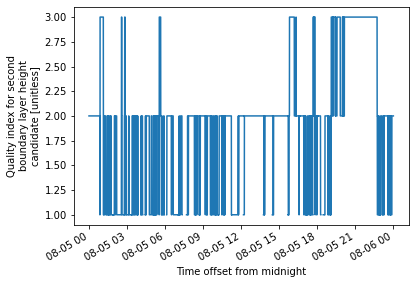

In [23]:
ceil_target['bl_index_2'].plot()

In [10]:
wrf_path = wrf_dir+'l5_0805m'

pblh_d02 = get_pblh(wrf_path, 2)
pblh_d03 = get_pblh(wrf_path, 3)
pblh_d04 = get_pblh(wrf_path, 4)

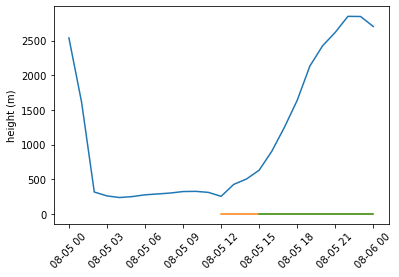

In [11]:
plt.plot(pblh_d02['Time'], pblh_d02)
plt.plot(pblh_d03['Time'], pblh_d03)
plt.plot(pblh_d04['Time'], pblh_d04)
plt.tick_params(axis='x', rotation=45)
plt.ylabel('height (m)')
plt.show()

In [43]:
pblh_d04

<xarray.DataArray 'PBLH' (Time: 10)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)
Coordinates:
    XLONG    float32 -97.48
    XLAT     float32 36.6
    XTIME    (Time) float32 1.62e+03 1.68e+03 1.74e+03 ... 2.1e+03 2.16e+03
  * Time     (Time) datetime64[ns] 2018-08-05T15:00:00 ... 2018-08-06
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  PBL HEIGHT
    units:        m
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [9]:
pblh = wrf.getvar(wrf_single, 'PBLH')

In [12]:
site_loc_ij = wrf.ll_to_xy(wrf_single, site_latitude, site_longitude)

In [16]:
pblh_1pt = pblh[site_loc_ij.values[1], site_loc_ij.values[0]]

In [17]:
pblh_1pt

    if ind == 0: 
        ds_all = ds
    else: 
        ds_all = xr.concat([ds, ds_all], dim='Time')

<xarray.DataArray 'PBLH' ()>
array(300.84473, dtype=float32)
Coordinates:
    XLONG    float32 -97.49
    XLAT     float32 36.59
    XTIME    float32 1.2e+03
    Time     datetime64[ns] 2018-08-05T08:00:00
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  PBL HEIGHT
    units:        m
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [6]:
for ind, file in enumerate(wrf_file_list[0]):
    
    print(file)

    wrf_single = Dataset(file, 'r')

    pblh = wrf.getvar(wrf_single, 'PBLH')

/


OSError: [Errno -51] NetCDF: Unknown file format: b'/'